<a href="https://colab.research.google.com/github/KennyOlat/kennyOlat/blob/main/AUTOMOBILE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.patches as mpatches


In [4]:
#importing the data from the directory

from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [5]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Automobile_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
auto=pd.read_csv('Automobile_data.csv')

print(auto)


     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [7]:
print(auto.shape)

(205, 26)


In [8]:
type(auto)

pandas.core.frame.DataFrame

In [9]:
print(auto.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [10]:
print(auto.tail())

     symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
2

In [11]:
# identify and replace the missing values

auto.replace('?', np.nan, inplace=True)
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
# Evaluating the missing values (missing values are replaces with true, otherwise false)
missing_dt=auto.isnull()
missing_dt.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# counting the number of missing values in all the attributes
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

missing value summary


normalized losses = 41
number of doors =2
bore = 4
stroke = 4
horsepower = 2
peak rmp=2
price = 4

For missing values these can be done
1) removing the entire column
2) removing the entire row
3) replacing missing values with mean if evenly distributed
4) replacing missing values with median if we have outliers;  that is if there is variation of some values from others

In [14]:
# replacing the Nan values with the mean of the column

columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in columns:
  normalized_mean = auto[column].astype(float).mean(axis=0)
  auto[column].replace(np.nan, normalized_mean, inplace=True)

In [15]:
auto['num-of-doors'].value_counts() #replacing NaN in various columns with most frequent class of their columns

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
auto['num-of-doors'].value_counts().idxmax() #using idxmax to calculate the frequent occured types

'four'

In [17]:
#repacing the missing number of doors with the most frequently occured type
auto['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [18]:
# for certain column, drop the row with NaN in price column
auto.dropna(subset=['price'], axis=0, inplace = True)

#reset index, because two rows are dropped
auto.reset_index(drop=True, inplace=True)

In [19]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


ANOTHER METHOD TO DEAL WITH REPLACING NAN WITH MEAN INDIVIDUALLY

In [20]:
df_temp = auto[auto['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
auto['normalized-losses'] = auto['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['price']!='?']
normalised_mean = df_temp['price'].astype(float).mean()
auto['price'] = auto['price'].replace('?',normalised_mean).astype(float)

df_temp = auto[auto['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
auto['horsepower'] = auto['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
auto['peak-rpm'] = auto['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
auto['bore'] = auto['bore'].replace('?',normalised_mean).astype(float)

df_temp = auto[auto['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
auto['stroke'] = auto['stroke'].replace('?',normalised_mean).astype(float)

auto['num-of-doors'] = auto['num-of-doors'].replace('?','four')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
auto.dtypes   #checking the datatype in each of the column

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
# correcting the datatype of some of the features printed above

auto[['bore', 'stroke']] = auto[['bore', 'stroke']].astype('float')
auto[['normalized-losses']] = auto[['normalized-losses']].astype('int')
auto[['price']] = auto[['price']].astype('float')
auto[['peak-rpm']] = auto[['peak-rpm']].astype('float')

In [22]:
#printing out the datatypes after conversion

auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [23]:
# summary of the features by using describe() function

auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


DATA STANDARDIZATION

In [24]:
# conversion of miles-per-gallon unit of fuel consumption to litre per km
#formular for unit conversion is L/100km = 235/mpg

auto['city-L/100km'] = 235/auto['city-mpg']
auto['highway-L/100km'] = 235/auto['highway-mpg']
auto[['city-L/100km', 'city-mpg', 'highway-L/100km', 'highway-mpg']].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.190476,21,8.703704,27
1,11.190476,21,8.703704,27
2,12.368421,19,9.038462,26
3,9.791667,24,7.833333,30
4,13.055556,18,10.681818,22


DATA NORMALIZATION

In [25]:
# replacing the (original-value) by (original-value)/(maximum-value)

auto['length'] = auto['length']/auto['length'].max()
auto['width'] = auto['width']/auto['width'].max()
auto['height'] = auto['height']/auto['height'].max()
auto[['length', 'width','height']].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


BINNING
This is the categorization of data for effective memory utilization

In [26]:
auto['horsepower']=auto['horsepower'].astype(float,copy=True)

binwidth = (max(auto['horsepower'])-min(auto['horsepower']))/4 #creating four bin of equal bandwidth, the fourth is because
binwidth                                                        #function 'cut' includes the rightmost value

60.0

In [27]:
# there is need to build bin array with minimum value to a maximum, with bandwidth calculate above
#the bins will be the values used to determine when one bin ends and another begins:

bins = np.arange(min(auto['horsepower']), max(auto['horsepower']), binwidth)
bins

array([ 48., 108., 168., 228.])

In [28]:
#setting group names

group_names = ['Low', 'Medium', 'High']

In [29]:
#applying the function 'cut' to determine what each value of 'auto['horsepower'] value belongs to

auto['horsepower-binned'] = pd.cut(auto['horsepower'], bins, labels=group_names, include_lowest=True)
auto[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Low
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,160.0,Medium


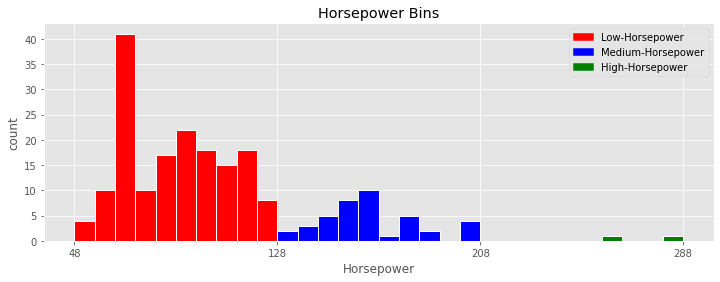

In [30]:
#BINNING VISUALIZATION

mpl.style.use(['ggplot'])

total_categories = 3

#getting the x-trick values
count, bin_edges = np.histogram(auto['horsepower'], 3)
fig, ax= plt.subplots(figsize=(12,4))
N, bins, patches = ax.hist(auto['horsepower'], bins=total_categories*10, edgecolor='white', linewidth = 1)
for i in range(0,10):
  patches[i].set_facecolor('r')
for i in range(10,20):
  patches[i].set_facecolor('b')
for i in range(20,30):
  patches[i].set_facecolor('g')

ax.set_xticks(bin_edges)

ax.set_title('Horsepower Bins')
ax.set_ylabel('count')
ax.set_xlabel('Horsepower')

red_patch = mpatches.Patch(color = 'red', label='Low-Horsepower')
blue_patch = mpatches.Patch(color = 'blue', label='Medium-Horsepower')
green_patch = mpatches.Patch(color = 'green', label='High-Horsepower')
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

In [31]:
#creating indicators variable (or dummy variable)

auto.columns
#Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',])

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [32]:
auto['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [33]:
dummy_varable_1 = pd.get_dummies(auto['fuel-type'])     #one heart encoding [creating columns for diesel and gas, put 0 for where there is diesel]
dummy_varable_1                                         # and 1 otherwise; the same is applicable to gas creating 1 where there is gas and 0, otherwise

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [34]:
dummy_varable_1 = pd.get_dummies(auto['fuel-type'])
dummy_varable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_varable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


diesel has been represented by 0 and gas by 1

In [35]:
#concatenation of the data variable into the original dataset

# merge dataframe auto and dummy_variable_1
auto = pd.concat([auto, dummy_varable_1], axis=1)

#drop the original column 'fuel-type' from auto
auto.drop('fuel-type', axis=1, inplace=True)

In [36]:
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500,18,22,17450.0,13.055556,10.681818,Medium,0,1


Repeating the same step for 'aspiration' column

In [37]:
dummy_varable_2 = pd.get_dummies(auto['aspiration'])
dummy_varable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_varable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [38]:
#concatenation of the data variable into the original dataset

# merge dataframe auto and dummy_variable_1
auto = pd.concat([auto, dummy_varable_2], axis=1)

#drop the original column 'aspiration' from auto
auto.drop('aspiration', axis=1, inplace=True)

In [39]:
auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [40]:
auto.to_csv('clean_auto_csv')

EXPLORATORY DATA ANALYSIS

In [41]:
# Observing the datatype of the cleaned dataset in other to work with it effectively

auto.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm                int64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [42]:
# Identifying variables that can aid the prediction especially of 'price'

#finding the correlation between the datatype int64 and float64

auto.corr()



,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,...,0.273678,-0.035823,0.034606,-0.082201,0.063165,-0.030190,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,...,0.237748,-0.218749,-0.178221,0.133999,0.232682,0.178527,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,...,-0.360700,-0.470414,-0.544082,0.583168,0.474040,0.578128,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,...,-0.287034,-0.670909,-0.704662,0.682986,0.659165,0.711597,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,...,-0.219861,-0.642704,-0.677218,0.728699,0.682850,0.728044,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,...,-0.320599,-0.048640,-0.107358,0.134388,-0.002333,0.085892,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,...,-0.266282,-0.757414,-0.797465,0.820825,0.791911,0.836742,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,...,-0.244600,-0.653658,-0.677470,0.861752,0.744952,0.777077,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,...,-0.254765,-0.584508,-0.586992,0.532300,0.555960,0.551943,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,...,-0.066860,-0.042179,-0.043961,0.082095,0.042550,0.055433,0.241820,-0.241820,-0.222970,0.222970


Another way to plot correlation graph

In [43]:
correlation = auto.corr()

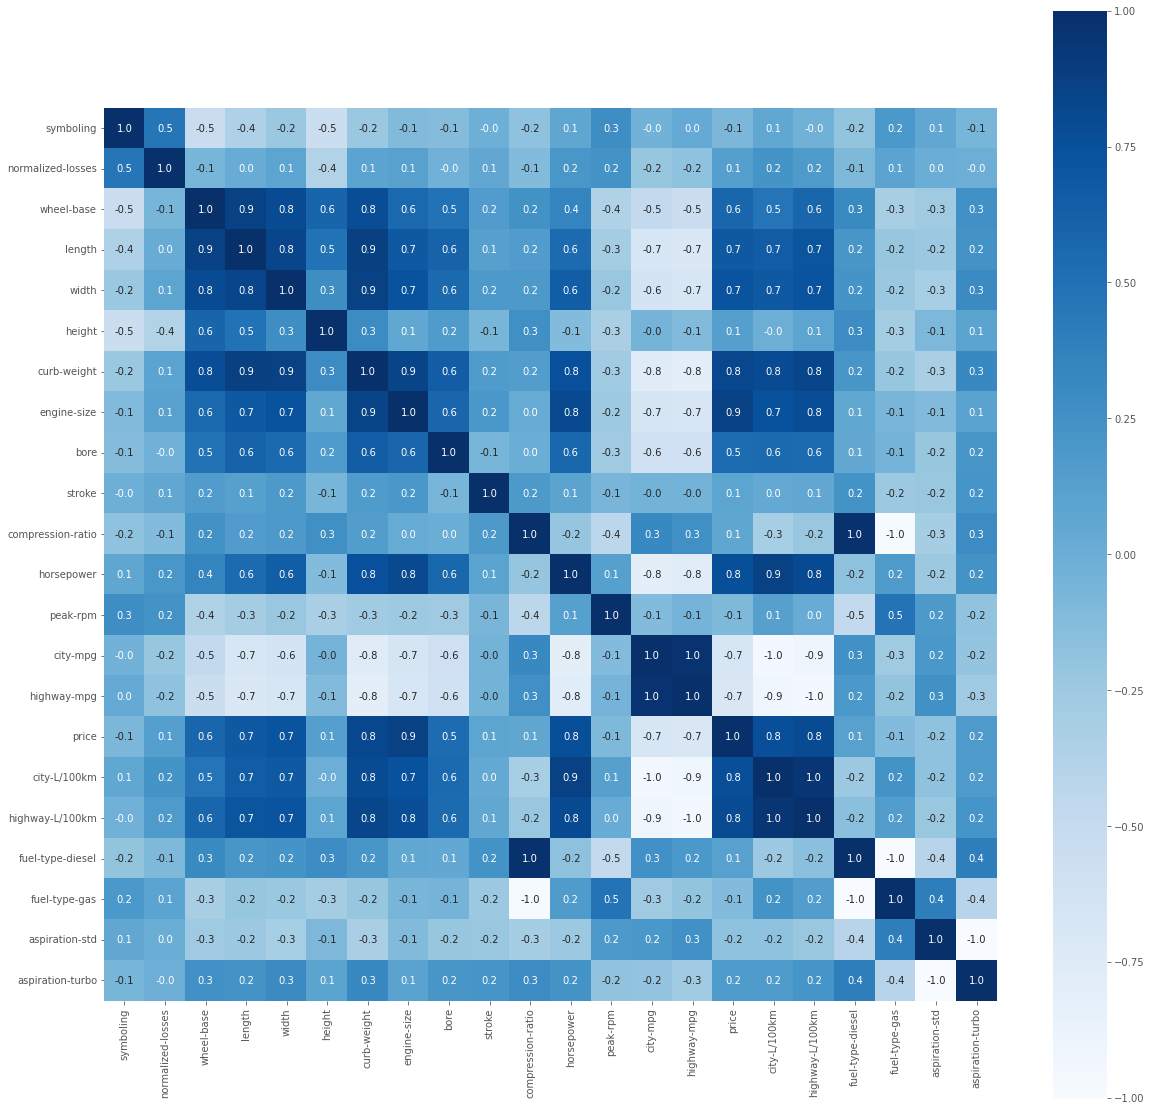

In [44]:
ax =plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [45]:
# Emploring the possible predictive variable which are 'engine-size', p'peak-rpm', 'stroke', 'highway-mpg'

auto[['price', 'engine-size', 'highway-mpg', 'peak-rpm', 'stroke']].corr()['price']

price          1.000000
engine-size    0.861752
highway-mpg   -0.690526
peak-rpm      -0.100851
stroke         0.082095
Name: price, dtype: float64

Based on the above result, it can be seen that engine size has strong positive correlation with price while highway-mpg ahs negative strong correlation with price. stroke and peak-rpm has weak correlation with price

VISUAL REPRESENTATION OF THIS CORRELATION

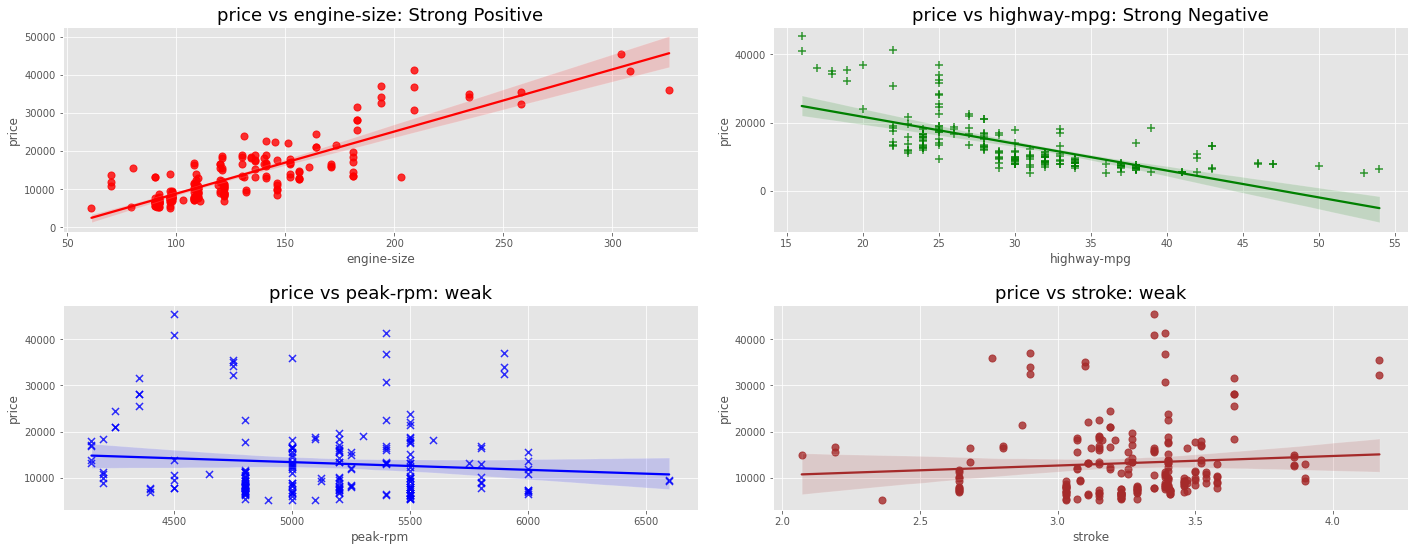

In [46]:
fig = plt.figure(figsize=(20,8)) #creating figures

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

sns.set(font_scale=1.5)

#subplot1:
sns.regplot(x ='engine-size', y='price', data=auto, color='red', marker='o', scatter_kws={'s':50}, ax=ax0)
ax0.set_title('price vs engine-size: Strong Positive')


#subplot2:
sns.regplot(x ='highway-mpg', y='price', data=auto, color='green', marker='+', scatter_kws={'s':50}, ax=ax1)
ax1.set_title('price vs highway-mpg: Strong Negative')

#subplot1:
sns.regplot(x='peak-rpm', y='price', data=auto, color='blue', marker='x', scatter_kws={'s':50}, ax=ax2)
ax2.set_title('price vs peak-rpm: weak')

#subplot1:
sns.regplot(x='stroke', y='price', data=auto, color='brown', marker='o', scatter_kws={'s':50}, ax=ax3)
ax3.set_title('price vs stroke: weak')

fig.tight_layout()

plt.show()


Using boxplot to visualize a small categoties of variables

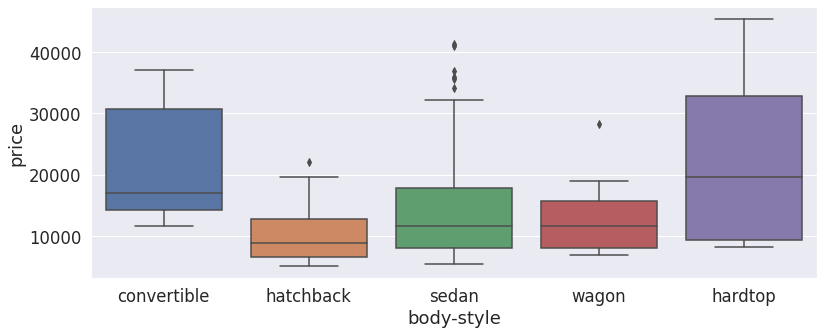

In [47]:
plt.figure(figsize=(13,5))
sns.boxplot(x='body-style', y='price', data=auto)

here due to the distributions of price between the different body-style categories have a significant overlap, and so body-style is not a not a good predictor of price. 


considering other features such as engine location and price


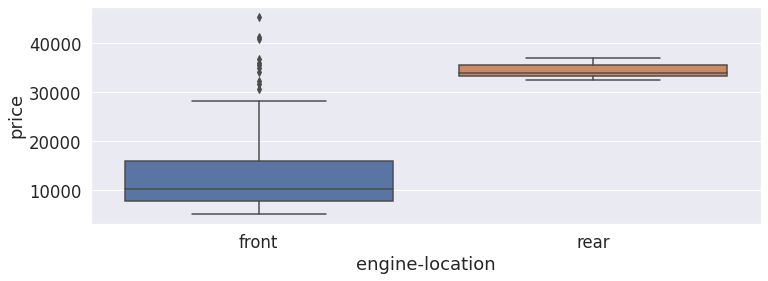

In [48]:
plt.figure(figsize=(12,4))
sns.boxplot(x="engine-location", y="price", data=auto)

there is a huge distribution of price between two categories of engine-location, front and rear, therefore it can be considered as a potential good predictor of price.


considering another feature: drive wheel and price


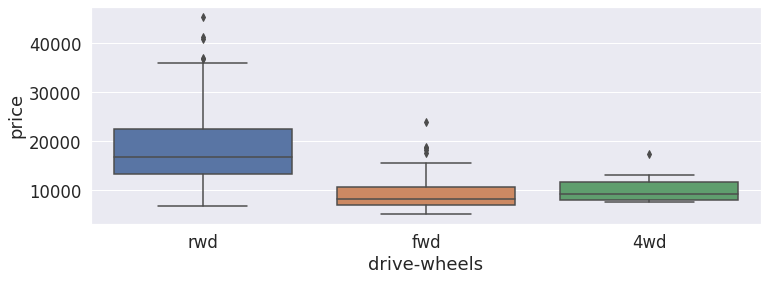

In [49]:
# drive-wheels
plt.figure(figsize=(12,4))
sns.boxplot(x="drive-wheels", y="price", data=auto)

The distribution of price between the different drive-wheels categories also differs. Therefore it can also be considered as a good a predictor of price.

In [50]:
# using describe function to describe the data

auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,...,5125.365854,25.219512,30.751220,13207.129353,9.949525,8.034347,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,...,476.979095,6.542142,6.886443,7868.768212,2.573104,1.849782,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7788.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5200.000000,24.000000,30.000000,10595.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


This shows the mean, standard deviation, min values, max values, 50%, 25% and 75% distribution of the dataset.

In [51]:
# using describe on object reveals the object types that are available in the dataset unlike the default describe() that skips it
auto.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205
unique,22,2,5,3,2,7,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,116,96,120,202,148,159,94


the objects such as count, unique, top and frequency values were revealed and displayed here

In [52]:
# we can use value count to understand how many units of each variable or characteristics the we have

auto['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [53]:
# Let's repeat the above steps but save the results to the dataframe
#"drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts':
drive_wheels_counts = auto['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


In [54]:
#repeating the same process for engine location

# engine-location as variable
engine_loc_counts = auto['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,202
rear,3


with the above result; engine-location for cars with front wheel is much much higher than for the rear, so this will affect the prediction.


Groups Analysis

The "groupby" function can be used to group data into various categories. 

The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [55]:
auto['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

we can also determine the most valuable drive wheel, this is done by grouping them and then find the average



In [56]:
auto_group = auto[['drive-wheels','price']]
auto_group_result = auto_group.groupby(['drive-wheels'],as_index= False).mean()
auto_group_result

,drive-wheels,price
0,4wd,10570.569928
1,fwd,9310.818823
2,rwd,19671.422755


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

we can also group with multiple variables. For example, let's group by both 'drivewheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [57]:
auto_group = auto[['drive-wheels','body-style','price']]
auto_group_result = auto_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
auto_group_result

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


The pivot table will be used in order to be able to visualize the grouped data well.

A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. 

"pivot' function is employed in converting the dataframe into a pivot table from the groups.

The drive-wheel will serve as variables for the row while body-style wiill be the columns of the table:

In [58]:
grouped_pivot = auto_group_result.pivot(index='drive-wheels',columns ='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Data are missing in some cells but can be replaced with 0 or any other potential values


In [59]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Heatmap can be employed to visualized between 'body-size' and 'price'

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis, respectively.

This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

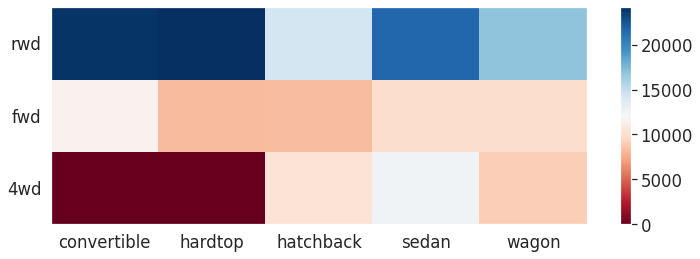

In [60]:
fig, ax=plt.subplots(figsize=(12,4))
im=ax.pcolor(grouped_pivot, cmap='RdBu')
#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=0)
fig.colorbar(im)
plt.show()

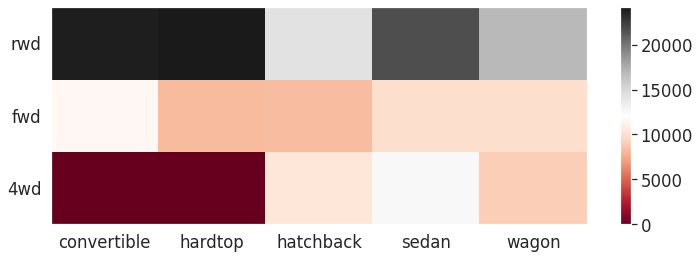

In [61]:
fig, ax=plt.subplots(figsize=(12,4))
im=ax.pcolor(grouped_pivot, cmap='RdGy')
#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=0)
fig.colorbar(im)
plt.show()

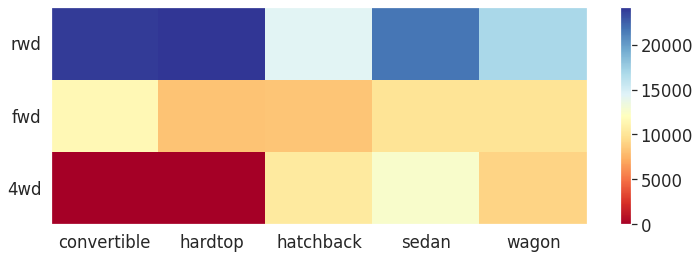

In [62]:

fig, ax=plt.subplots(figsize=(12,4))
im=ax.pcolor(grouped_pivot, cmap='RdYlBu')
#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=0)
fig.colorbar(im)
plt.show()

Correlation and Causation Analysis

Correlation: a measure of the extent of interdependence between variables.
Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. 

Determining correlation is much simpler than determining causation, as causation may require independent experimentation.

In [63]:
pearson_coef, p_value = stats.pearsonr(auto['wheel-base'], auto['price'])
print("The Pearson Coefficient for wheel-base vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['horsepower'], auto['price'])
print("The Pearson Coefficient for horsepower vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['length'], auto['price'])
print("The Pearson Coefficient for length vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['width'], auto['price'])
print("The Pearson Coefficient for width vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['curb-weight'], auto['price'])
print( "The Pearson Coefficient for curb-weight vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['engine-size'], auto['price'])
print("The Pearson Coefficient for engine-size vs price is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(auto['bore'], auto['price'])
print("The Pearson Coefficient for bore vs price is", pearson_coef, " with a P-value of P ", p_value)
pearson_coef, p_value = stats.pearsonr(auto['city-mpg'], auto['price'])
print("The Pearson Coefficient for city-mpg vs price is", pearson_coef, "with a P-value of P ", p_value)
pearson_coef, p_value = stats.pearsonr(auto['highway-mpg'], auto['price'])
print( "The Pearson Coefficient for highway-mpg vs price is", pearson_coef, 'with a P-value of P ', p_value)

The Pearson Coefficient for wheel-base vs price is 0.5831681499789549 with a P-value of P  4.527625545686636e-20
The Pearson Coefficient for horsepower vs price is 0.7579459704465277 with a P-value of P  1.59083195722031e-39
The Pearson Coefficient for length vs price is 0.6829862954386219 with a P-value of P  1.6498873291218535e-29
The Pearson Coefficient for width vs price is 0.7286988175931837 with a P-value of P  3.2145204838049385e-35
The Pearson Coefficient for curb-weight vs price is 0.8208247333547288 with a P-value of P  2.8663321070274196e-51
The Pearson Coefficient for engine-size vs price is 0.861752243685972 with a P-value of P  9.669661923635875e-62
The Pearson Coefficient for bore vs price is 0.5323000195387406  with a P-value of P  2.1398306512856245e-16
The Pearson Coefficient for city-mpg vs price is -0.6674492651600004 with a P-value of P  8.463700497727807e-28
The Pearson Coefficient for highway-mpg vs price is -0.6905257341183487 with a P-value of P  2.232467405837

correlations shows the relationship between two variables while p_values show how real the correlation is . The smaller the P_value the better the the better the correlation e.g. the experimental result is not because of some chance. high positive correlation shows the higher the price the higher the variable, high negative correlation means that the higher the price the lower the variable

CONCLUSIONS

All above continuous features are having positive relationship with price making good predictors of price. The details are given below for each:

Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (~0.585).

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).


Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834). 

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.543).

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

ANOVA

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score.

A larger score means there is a larger difference between the means.

P-value: P-value tells us the statistical significance of our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

ANOVA on Drive Wheels variable

Let's see if different types 'drive-wheels' impact 'price'. We group the data:
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before-hand.

In [64]:
auto_group = auto[['drive-wheels','price']]
groups = auto_group[['drive-wheels','price']].groupby(['drive-wheels'])
groups.head(2)

,drive-wheels,price
0,rwd,13495.000000
1,rwd,16500.000000
3,fwd,13950.000000
4,4wd,17450.000000
5,fwd,15250.000000
9,4wd,13207.129353


We can obtain the values of the method group using the method "get_group":

In [ ]:
groups.get_group('4wd')['price']

4      17450.000000
9      13207.129353
140     7603.000000
144     9233.000000
145    11259.000000
148     8013.000000
149    11694.000000
154     7898.000000
155     8778.000000
Name: price, dtype: float64

In [65]:
# ANOVA
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'], groups.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.5036668266912 , P = 3.5392707916047903e-23


This is a great result, with a large F test score showing the importance of Drive Wheels for price prediction. 

The large F test score suggests that the mean price value for these three groups varies alot. Consequently showing a strong correlation of these three groups with price. But does this mean all three tested groups are all this highly correlated with price?

In [66]:
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'])
print( "ANOVA results for separate fwd, rwd: F=", f_val, ", P =", p_val )
f_val, p_val = stats.f_oneway(groups.get_group('4wd')['price'], groups.get_group('rwd')['price'])
print( "ANOVA results for separate 4wd, rwd: F=", f_val, ", P =", p_val)
f_val, p_val = stats.f_oneway(groups.get_group('4wd')['price'], groups.get_group('rwd')['price'])
print( "ANOVA results for separate 4wd, fwd: F=", f_val, ", P =", p_val)

ANOVA results for separate fwd, rwd: F= 129.41115759339715 , P = 2.6524240289951807e-23
ANOVA results for separate 4wd, rwd: F= 8.879065438652509 , P = 0.00378273257813761
ANOVA results for separate 4wd, fwd: F= 8.879065438652509 , P = 0.00378273257813761


The separate results show that main variation of price mean values is in fwd and rwd groups. 

So even inside feature "Drive Wheels", these two groups are most important.

Conclusion Exploratory Data Analysis

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

In [67]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

MODEL DEVELOPMENT AND EVALUATION

A model is developed using predictor variables identified as important in exploratory data analysis.

In [69]:
auto_new = auto[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',
'bore', 'wheel-base', 'city-mpg', 'length', 'width', ]]

Splitting data into training and testing with ratio of 80:20 respectively

In [70]:
x_train, x_test, y_train, y_test = train_test_split(auto_new, auto['price'], test_size = 0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 41
number of training samples: 164


Multiple Linear Regression


In [71]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Multiple Linear Regression Evaluation

In [72]:
print("The R_squared value for Multiple Linear Regression Model is: ", lm.score(x_test, y_test))

The R_squared value for Multiple Linear Regression Model is:  0.7220726895187243


We can say that ~ 82% of the variation of the price is explained by this multiple linear regression model

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


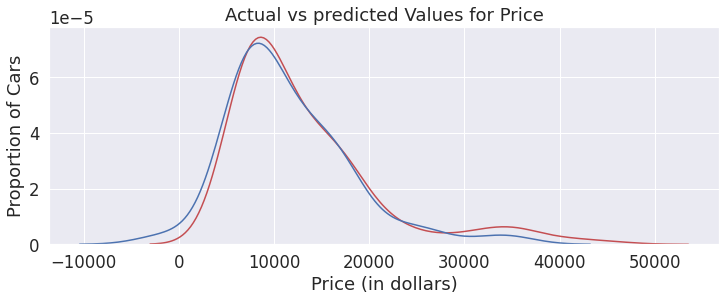

In [73]:
predicted = lm.predict(x_test)

plt.figure(figsize=(12, 4))

ax1 = sns.distplot(auto['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Polynomial Linear Regression

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline.

In [74]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

we input the list as an argument to the pipeline constructor

In [75]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can now normalize the data, perform a transform and fit the model simultaneously.

In [76]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Polynomial Linear Regression Evaluation

In [77]:
print("The R_squared value for Polynomial Linear Regression Model is: ", pipe.score(x_test, y_test))

The R_squared value for Polynomial Linear Regression Model is:  0.7528634537431333


We can say that ~ 85% of the variation of the price is explained by this polynomial regression model

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


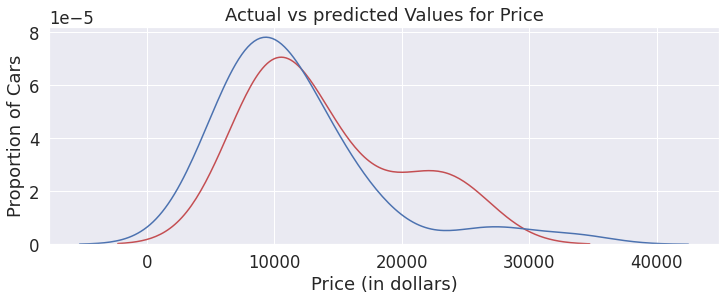

In [ ]:
predicted = pipe.predict(x_test)
plt.figure(figsize=(12, 4))
ax1 = sns.distplot(auto_group_result['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

As it can be seen that for Polynomial Linear Regression, the fitted values are much more closer to the actual values than Multiple Linear Regression.

Random Forest Regression

Random Forest is non linear regression based on decision trees.

In [78]:
Rf = RandomForestRegressor()

Rf.fit(x_train, y_train)

RandomForestRegressor()

Random Forest Regression Evaluation

In [79]:
print("The R_squared value for Random Forest Regression Model is: ", Rf.score(x_test, y_test))

The R_squared value for Random Forest Regression Model is:  0.8817164965507965


We can say that ~ 95% of the variation of the price is explained by this random forest model

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


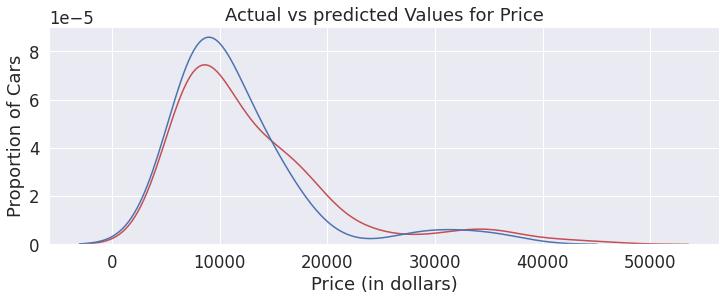

In [80]:
predicted = Rf.predict(x_test)
plt.figure(figsize=(12, 4))
ax1 = sns.distplot(auto['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

We can see that the random forest model performed even better than polynomial regression.

Best Model Refinement

As can be seen, the best performing model with approximately 0.95 r-squared value is Random Forest. 

Now to refine it and make it perform even better, its hyper parameters tuning is done in grid search manner.

Creating Grid of hyperparameter values

In [81]:
#Number of trees in random forest
n_estimators = [100,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 40, 80, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the grid
grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
Rf_grid = GridSearchCV(estimator = Rf, param_grid=grid, cv=2, n_jobs = -1, verbose=2)

fitting Random Forest for all hyperparameters combinations

In [85]:
Rf_grid.fit(x_train, y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 40, 80, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 8],
                         'n_estimators': [100, 500]},
             verbose=2)

In [86]:
BestRf = Rf_grid.best_estimator_
BestRf

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=8)

Best performing Random Forest Model R_square value

In [87]:
print('After Refinement, the R_sqared value is :', BestRf.score(x_test, y_test))

After Refinement, the R_sqared value is : 0.8955441555982627
